In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

import Classification_Function as cl


In [39]:
import importlib
importlib.reload(cl)

<module 'Classification_Function' from 'C:\\Users\\lucas\\Documents\\Politecnico di Milano\\Geospatial Processing\\Project\\GeospatialProject\\Classification_Function.py'>

In [40]:
RASTER_FILE_PATH = "Data/Clipped_LC_Belgium_2022.tif"
MAX_CLUSTERS = 10
OUTPUT_RASTER_PATH = "Data/Classified_Clipped_LC_Belgium_2022.tif"


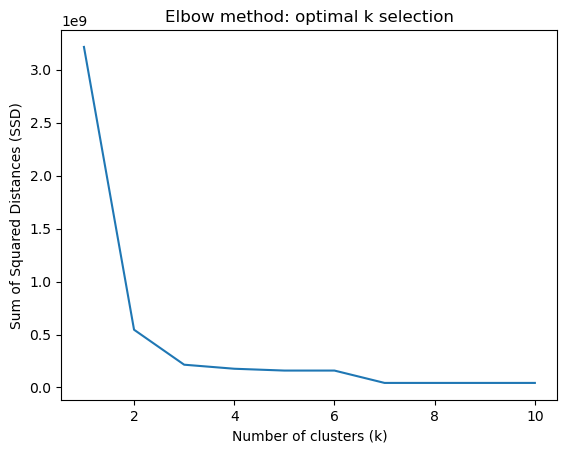

Classified raster saved.
Optimal number of clusters: 2

FINAL FLOAT CENTROIDS FROM K-MEANS:
[132.53749037   7.39257025]

Number of centroids: 2


In [41]:
labels, centroids, optimal_k = cl.classify_single_band_raster(RASTER_FILE_PATH, OUTPUT_RASTER_PATH, max_k=MAX_CLUSTERS)

print(f"Optimal number of clusters: {optimal_k}")
cl.show_cluster_centroids(centroids)


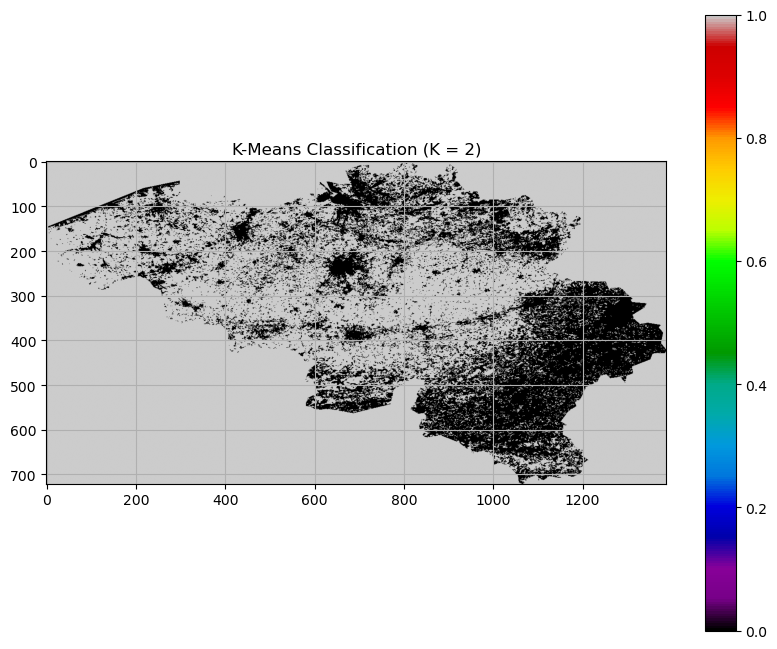

In [42]:
plt.figure(figsize=(10, 8))
plt.imshow(labels, cmap="nipy_spectral")
plt.title(f"K-Means Classification (K = {optimal_k})")
plt.colorbar()
plt.grid(True)
plt.show()
